# Matched Filter example

Implement a matched filter using cross-correlation, to recover a signal that has passed through a noisy channel. See [signal.correlate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html#scipy.signal.correlate) documentation for further details.

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

Generate a signal of length 128, consisting of a regular repeating square wave pattern, and then generate a combined signal plus noise model by adding gaussian noise to the signal. The cross-correlation is then performed between the signal+noise, and a rectangular pulse of width 128 (compared with the total signal length of 1024). 

By cross-correlating these two, one can see where the rectangular pulse is either positively correlated (red circle positive), or anti-correlated (red circle negative) with the signal+noise.

In [40]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode="same") / 128

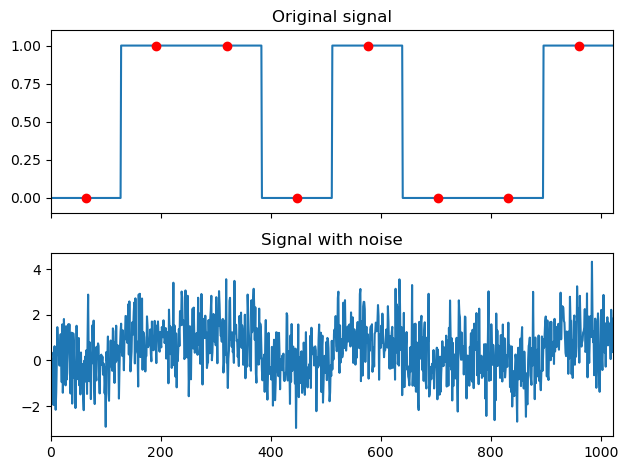

In [41]:
clock = np.arange(64, len(sig), 128)
lags = signal.correlation_lags(len(sig), len(sig_noise))

fig, (ax_orig, ax_noise) = plt.subplots(2, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

The resulting cross-correlation is peaked at zero lag, which indicates that the noise+signal (N+S) is indeed correlated with the input signal. The peak indicates that the signal is present in the N+S.

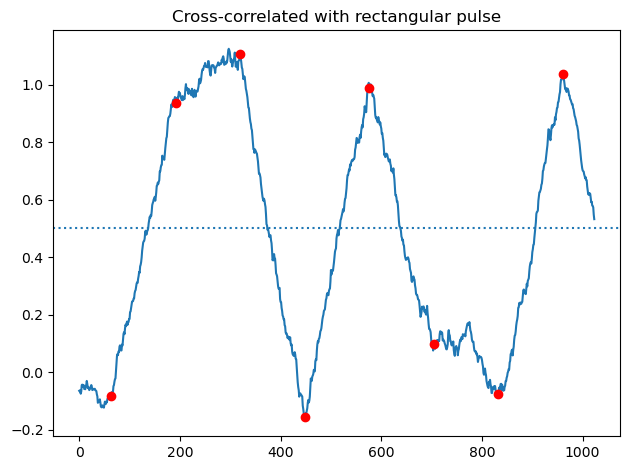

In [42]:
fig2, ax_corr = plt.subplots()
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
fig2.tight_layout()
plt.show()

Now we can check if a particular signal model exists in a noisy channel by cross-correlating the signal with the signal+noise, and plotting it as a function of lag between the two inputs. If there is a peak at zero lag, we suspect the signal is present. In this example, we cross-correlate the signal with the signal+noise, so it is obviously the case that the signal is present in the data. 

In [43]:
corr = signal.correlate(sig_noise, sig)
lags = signal.correlation_lags(len(sig), len(sig_noise))

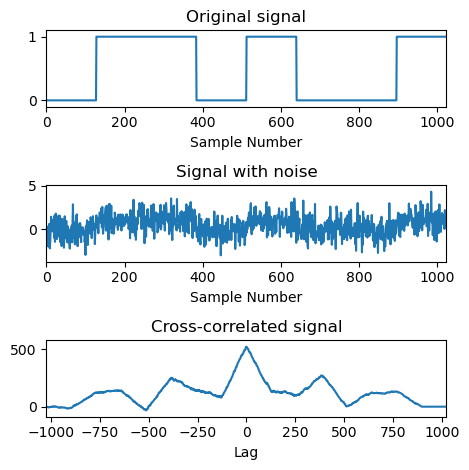

In [44]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(sig)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

As expected, there is a peak at zero lag.